<a href="https://colab.research.google.com/github/johanik/ML_study/blob/main/BDA712_00_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Session \# 10


---


by Josué Obregón <br>
BDA714-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>


## Objectives

The objective of this worksheet is to introduce the student to different type of techniques and functions for model assesing and model selection.

## Importing libraries 


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

Donwnload the files that we will use

In [ ]:
!mkdir data

In [ ]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V', # autoMPG6  https://drive.google.com/file/d/1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V/view?usp=sharing
        ]
outputs = ['autoMPG6.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V
To: /content/data/autoMPG6.csv
100%|██████████| 10.7k/10.7k [00:00<00:00, 7.59MB/s]


# Pipes

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data/autoMPG6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Displacement  392 non-null    float64
 1   Horse_power   392 non-null    int64  
 2   Weight        392 non-null    int64  
 3   Acceleration  392 non-null    float64
 4   Model_year    392 non-null    int64  
 5   Mpg           392 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.5 KB


In [ ]:
df.describe()

,Displacement,Horse_power,Weight,Acceleration,Model_year,Mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [ ]:
X = df[['Horse_power','Displacement']]
y = df['Mpg']

In [ ]:
pipe = Pipeline([('minmax', MinMaxScaler()),
                 ('LR', LinearRegression())])

pipe

Pipeline(steps=[('minmax', MinMaxScaler()), ('LR', LinearRegression())])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipe

Pipeline(steps=[('minmax', MinMaxScaler()), ('LR', LinearRegression())])

In [ ]:
 X_train, X_test, y_train, y_test = (X,y,test_size=.20, shuffle=True, random_state=712)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('LR', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([20.40323958, 12.50294384, 21.47059155,  6.30851999, 31.4449213 ,
       26.38797552, 27.92609709, 27.76333005, 28.17995904, 22.44410177,
       28.64350891,  6.30851999, 28.68888375, 27.61620329, 27.74236126,
       29.84389336, 25.67932947, 23.81378257, 29.33651467, 29.77565848,
       22.84594607, 25.964472  , 23.75276744, 26.98988638, 30.21136503,
       22.16359731, 13.62443641, 23.1142475 , 31.09841842, 25.964472  ,
       23.26292028, 28.64350891, 12.45258571, 29.63918873, 20.78824279,
       29.84733062, 14.54999011, 11.34673343, 29.64262599,  9.55440469,
       11.12380683, 23.45662269, 16.73917986, 21.75075079,  5.04866642,
       13.91147018, 24.11645663, 28.68733773, 28.4826331 , 17.7668307 ,
       13.86764135, 17.30602766, 15.44082598, 15.44082598, 13.1852926 ,
       29.84389336,  5.42834112, 28.18150507, 22.16359731,  5.04866642,
       25.61951514, 16.80741474, 28.68200923, 21.51974887, 21.47059155,
       27.15076219, 21.51974887, 12.28379972, 27.80183037, 14.98

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
def print_reg_metrics(y_true ,y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2: {r2_score(y_true, y_pred)}')


In [ ]:
print_reg_metrics(y_test, y_pred)

MSE: 22.276320809518445
MAE: 3.6639010798641363
MAPE: 0.17018787218241435
R2: 0.6762237776793226


## Using other predictors

# Validation set

In [ ]:
X = df[['Horse_power']]
y = df['Mpg']

CPU times: user 642 ms, sys: 2.29 ms, total: 644 ms
Wall time: 1.09 s


Text(0, 0.5, 'Test MSE')

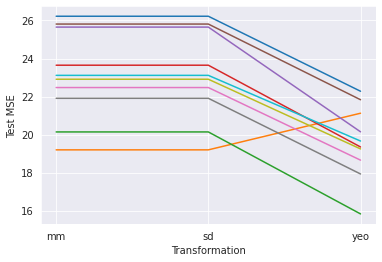

In [ ]:
%%time
transformation_list = [('minmax',MinMaxScaler()),
                       ('sd', StandardScaler()),
                       ('yeo', PowerTransformer())]

for i in range(10):
  mses = []
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.50, shuffle=True, random_state=i+1)
  for trans in transformation_list:
    pipe = Pipeline([trans, ('LR', LinearRegression())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

  sns.lineplot(x=['mm','sd','yeo'], y=mses)
plt.xlabel('Transformation')
plt.ylabel('Test MSE')


# Cross-validation

## Leve one out cross-validation